<h1><font color='blue'> 8E and 8F: Finding the Probability P(Y==1|X)</font></h1>

<h2><font color='Geen'> 8E: Implementing Decision Function of SVM RBF Kernel</font></h2>

<font face=' Comic Sans MS' size=3>After we train a kernel SVM model, we will be getting support vectors and their corresponsing coefficients $\alpha_{i}$

Check the documentation for better understanding of these attributes: 

https://scikit-learn.org/stable/modules/generated/sklearn.svm.SVC.html
<img src='https://i.imgur.com/K11msU4.png' width=500>

As a part of this assignment you will be implementing the ```decision_function()``` of kernel SVM, here decision_function() means based on the value return by ```decision_function()``` model will classify the data point either as positive or negative

Ex 1: In logistic regression After traning the models with the optimal weights $w$ we get, we will find the value $\frac{1}{1+\exp(-(wx+b))}$, if this value comes out to be < 0.5 we will mark it as negative class, else its positive class

Ex 2: In Linear SVM After traning the models with the optimal weights $w$ we get, we will find the value of $sign(wx+b)$, if this value comes out to be -ve we will mark it as negative class, else its positive class.

Similarly in Kernel SVM After traning the models with the coefficients $\alpha_{i}$ we get, we will find the value of 
$sign(\sum_{i=1}^{n}(y_{i}\alpha_{i}K(x_{i},x_{q})) + intercept)$, here $K(x_{i},x_{q})$ is the RBF kernel. If this value comes out to be -ve we will mark $x_{q}$ as negative class, else its positive class.

RBF kernel is defined as: $K(x_{i},x_{q})$ = $exp(-\gamma ||x_{i} - x_{q}||^2)$

For better understanding check this link: https://scikit-learn.org/stable/modules/svm.html#svm-mathematical-formulation
</font>

## Task E

> 1. Split the data into $X_{train}$(60), $X_{cv}$(20), $X_{test}$(20)

> 2. Train $SVC(gamma=0.001, C=100.)$ on the ($X_{train}$, $y_{train}$)

> 3. Get the decision boundry values $f_{cv}$ on the $X_{cv}$ data  i.e. ` `$f_{cv}$ ```= decision_function(```$X_{cv}$```)```  <font color='red'>you need to implement this decision_function()</font>

In [2]:
import numpy as np
import pandas as pd
from sklearn.datasets import make_classification
import numpy as np
from sklearn.svm import SVC
from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt

In [3]:
X, y = make_classification(n_samples=5000, n_features=5, n_redundant=2,
                           n_classes=2, weights=[0.7], class_sep=0.7, random_state=15)
print(type(X))

<class 'numpy.ndarray'>


### Pseudo code

clf = SVC(gamma=0.001, C=100.)<br>
clf.fit(Xtrain, ytrain)

<font color='green'>def</font> <font color='blue'>decision_function</font>(Xcv, ...): #use appropriate parameters <br>
&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;<font color='green'>for</font> a data point $x_q$ <font color='green'>in</font> Xcv: <br>
&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;<font color='grey'>#write code to implement $(\sum_{i=1}^{\text{all the support vectors}}(y_{i}\alpha_{i}K(x_{i},x_{q})) + intercept)$, here the values $y_i$, $\alpha_{i}$, and $intercept$ can be obtained from the trained model</font><br>
   <font color='green'>return</font> <font color='grey'><i># the decision_function output for all the data points in the Xcv</i></font>
    
fcv = decision_function(Xcv, ...)  <i># based on your requirement you can pass any other parameters </i>

<b>Note</b>: Make sure the values you get as fcv, should be equal to outputs of clf.decision_function(Xcv)


In [4]:
# you can write your code here

import math

#Split the data into  Xtrain(60),  Xcv(20),  Xtest(20)
print("Total Dataset (Before spliting): ",X.shape)

X_train, X_test, y_train, y_test = train_test_split( X, y, test_size=0.2, random_state=12)
X_train, X_CV, y_train, y_CV = train_test_split( X_train, y_train, test_size=0.25, random_state=12)

print("X_train (60%):", X_train.shape)
print("X_CV (20%):",X_CV.shape)
print("X_test (20%):",X_test.shape)
    

Total Dataset (Before spliting):  (5000, 5)
X_train (60%): (3000, 5)
X_CV (20%): (1000, 5)
X_test (20%): (1000, 5)


In [5]:
#Train  SVC(gamma=0.001,C=100)  on the ( Xtrain ,  ytrain )
#Ref: https://stackoverflow.com/questions/20113206/scikit-learn-svc-decision-function-and-predict#:~:text=Python%27s%20SVM%20implementation%20uses%20one-vs-one.%20That%27s%20exactly%20what,the%20just%20the%20regular%20binary%20SVM%20decision%20boundary

clf = SVC(gamma=0.001,C=100,random_state=12)
clf.fit(X_train,y_train)

#Get the decision boundry values  fcv  on the  Xcv  data i.e.  fcv  = decision_function( Xcv ) you need to implement this decision_function()
#Define decision_function for svm

gamma = 0.001
def decision_function( sv, nv, a, b, X):
    # calculate the kernels
    k = [math.exp(-gamma * np.dot((vi - X), vi - X)) for vi in sv]
    #print(k.shape)

    # define the start and end index for support vectors for each class
    start = [sum(nv[:i]) for i in range(len(nv))]
    end = [start[i] + nv[i] for i in range(len(nv))]
    #print(len(nv))
    #print(start)
    #print(end)

    # calculate: sum(a_p * k(x_p, x)) between every 2 classes
    
    c = [ sum(a[ i ][p] * k[p] for p in range(start[j], end[j])) +
          sum(a[j-1][p] * k[p] for p in range(start[i], end[i]))
                for i in range(len(nv)) for j in range(i+1,len(nv))]
    

    # add the intercept
    return [sum(x) for x in zip(c, b)]
#print(clf.support_vectors_)
#k = kernel(clf.support_vectors_, X_CV[0])
#print(len(k))

fcv = []
for i,X in enumerate(X_CV):
    fcv.append(decision_function(clf.support_vectors_,clf.n_support_,clf.dual_coef_,clf.intercept_,X)[0])    

decision_Func_CV_fromsvm = clf.decision_function(X_CV)
print("**********fcv********************* ")
print(fcv[0:10])
print("**********clf.decision_function(Xcv)********************* ")

print(decision_Func_CV_fromsvm[0:10])


**********fcv********************* 
[-3.4302657404611487, -3.0443986142697064, -1.188622388183543, -0.4208564050010717, 1.5256612283167816, 0.1883064121332756, -2.8687024637862883, -0.47832228149371425, 2.5284867300154623, 2.6875984607807517]
**********clf.decision_function(Xcv)********************* 
[-3.43026574 -3.04439861 -1.18862239 -0.4208564   1.52566123  0.18830641
 -2.86870246 -0.47832228  2.52848673  2.68759846]


<h2><font color='Geen'> 8F: Implementing Platt Scaling to find P(Y==1|X)</font></h2>

Check this <a href='https://drive.google.com/open?id=133odBinMOIVb_rh_GQxxsyMRyW-Zts7a'>PDF</a>
<img src='https://i.imgur.com/CAMnVnh.png'>


## TASK F


> 4. Apply SGD algorithm with ($f_{cv}$, $y_{cv}$) and find the weight $W$ intercept $b$ ```Note: here our data is of one dimensional so we will have a one dimensional weight vector i.e W.shape (1,)``` 

> Note1: Don't forget to change the values of $y_{cv}$ as mentioned in the above image. you will calculate y+, y- based on data points in train data

> Note2: the Sklearn's SGD algorithm doesn't support the real valued outputs, you need to use the code that was done in the `'Logistic Regression with SGD and L2'` Assignment after modifying loss function, and use same parameters that used in that assignment.
<img src='https://i.imgur.com/zKYE9Oc.png'>
if Y[i] is 1, it will be replaced with y+ value else it will replaced with y- value

> 5. For a given data point from $X_{test}$, $P(Y=1|X) = \frac{1}{1+exp(-(W*f_{test}+ b))}$ where ` `$f_{test}$ ```= decision_function(```$X_{test}$```)```, W and b will be learned as metioned in the above step

__Note: in the above algorithm, the steps 2, 4 might need hyper parameter tuning, To reduce the complexity of the assignment we are excluding the hyerparameter tuning part, but intrested students can try that__


If any one wants to try other calibration algorithm istonic regression also please check these tutorials

1. http://fa.bianp.net/blog/tag/scikit-learn.html#fn:1

2. https://drive.google.com/open?id=1MzmA7QaP58RDzocB0RBmRiWfl7Co_VJ7

3. https://drive.google.com/open?id=133odBinMOIVb_rh_GQxxsyMRyW-Zts7a

4. https://stat.fandom.com/wiki/Isotonic_regression#Pool_Adjacent_Violators_Algorithm


In [6]:
#You will compute N+ and N- using the ytrain.

#You will compute the value of y+ and y- using the N+ and N- computed in Step 1.

#You will replace all 0s with y- and all 1s with y+ in the ycv which will result in the modified ycv.

#You will pass fcv (computed by passing Xcv to the decision function) as X and modified ycv as y to the train function and will compute the value of w and b after training. No need to perform any validation. Perform only the training using the fcv and modified ycv.

#Plot the epoch vs loss curve for the training done in step 4 and make sure the curve is decreasing.

#Compute ftest by passing Xtest to the decision function. Now compute the value of P(Y=1|Xtest) = 1/(1+exp(-(w*ftest+ b))). The size of this output will be the same as the size of the Xtest where each value will be a scalar corresponding to the probability of that point in Xtest to belong to 1. Print the output once done.



# You will compute N+ and N- using the ytrain.


In [7]:
#Apply SGD algorithm with ( fcvfcv ,  ycvycv ) and find the weight  WW  intercept  bb  Note: here our data is of one dimensional so we will have a one dimensional weight vector i.e W.shape (1,)

from sklearn.linear_model import SGDClassifier

clf2 = SGDClassifier()
unique, counts = np.unique(y_train, return_counts=True)
print("Value counts of Y Trains")
print(unique[0],counts[0])
print(unique[1],counts[1])
print()

#You will compute N+ and N- using the ytrain.
N_minus = counts[0]
N_plus = counts[1]
print("N_minus",N_minus)
print("N_plus",N_plus)
print()

Value counts of Y Trains
0 2084
1 916

N_minus 2084
N_plus 916



# You will compute the value of y+ and y- using the N+ and N- computed in Step 1.

In [8]:

y_plus = ((N_plus+1)/(N_plus+2))
y_minus =(1/(N_minus+2))
print("y_plus",y_plus)
print("y_minus",y_minus)
print()

y_plus 0.9989106753812637
y_minus 0.00047938638542665386



# You will replace all 0s with y- and all 1s with y+ in the ycv which will result in the modified ycv.

In [9]:

y_CV_modified =np.where(y_CV == 0, y_minus, y_plus)
print("ycv modified after replacing all 0s with y- and all 1s with y+")
print(y_CV_modified)

ycv modified after replacing all 0s with y- and all 1s with y+
[4.79386385e-04 4.79386385e-04 4.79386385e-04 4.79386385e-04
 9.98910675e-01 9.98910675e-01 4.79386385e-04 4.79386385e-04
 9.98910675e-01 9.98910675e-01 4.79386385e-04 9.98910675e-01
 4.79386385e-04 9.98910675e-01 4.79386385e-04 4.79386385e-04
 4.79386385e-04 4.79386385e-04 4.79386385e-04 4.79386385e-04
 4.79386385e-04 4.79386385e-04 4.79386385e-04 9.98910675e-01
 4.79386385e-04 4.79386385e-04 4.79386385e-04 4.79386385e-04
 4.79386385e-04 4.79386385e-04 9.98910675e-01 9.98910675e-01
 9.98910675e-01 9.98910675e-01 4.79386385e-04 4.79386385e-04
 4.79386385e-04 4.79386385e-04 4.79386385e-04 4.79386385e-04
 9.98910675e-01 9.98910675e-01 4.79386385e-04 4.79386385e-04
 4.79386385e-04 9.98910675e-01 4.79386385e-04 9.98910675e-01
 4.79386385e-04 4.79386385e-04 4.79386385e-04 4.79386385e-04
 9.98910675e-01 4.79386385e-04 4.79386385e-04 4.79386385e-04
 4.79386385e-04 4.79386385e-04 4.79386385e-04 9.98910675e-01
 4.79386385e-04 4.7938

# Logistic Regression with SGD and L2

In [10]:
#Initialize weights 


def initialize_weights(row_vector):
    ''' In this function, we will initialize our weights and bias'''
    #initialize the weights as 1d array consisting of all zeros similar to the dimensions of row_vector
    #you use zeros_like function to initialize zero, check this link https://docs.scipy.org/doc/numpy/reference/generated/numpy.zeros_like.html
    #initialize bias to zero
    w = np.zeros_like(row_vector)
    b = 0
    return w,b


In [11]:
#Compute sigmoid 

#$sigmoid(z)= 1/(1+exp(-z))$


import math

def sigmoid(z):
    ''' In this function, we will return sigmoid of z'''
    # compute sigmoid(z) and return
    sigmoid = 1/(1+math.exp(-z))
    return sigmoid


In [12]:
def sig(w,x,b):
    return(1/(1+math.exp(-(np.dot(x,w)+b))))


def log_loss(w,b,X,Y):
    N = len(X)
    sum_log = 0
    for i in range(N):
        sum_log += Y[i]*np.log10(sig(w,X[i],b))+ (1-Y[i])*np.log10(1-sig(w,X[i],b))
    return -1*sum_log/N



In [13]:
#Compute gradient w.r.to  'w' 


#$dw^{(t)} = x_n(y_n − σ((w^{(t)})^{T} x_n+b^{t}))- \frac{λ}{N}w^{(t)}$ 



#make sure that the sigmoid function returns a scalar value, you can use dot function operation
def gradient_dw(x,y,w,b,alpha,N):
    '''In this function, we will compute the gardient w.r.to w '''
    #print("w",w)
    #print("x",x)
    #print("b",b)
    #print(np.dot(w,x))
    #print(sigmoid(np.dot(w,x)+b))
    dw = (x*(y-sigmoid(np.dot(w,x)+b))) - ((alpha/N)*w)
    #print(dw)
    return dw


In [14]:
#Compute gradient w.r.to 'b' 


#$ db^{(t)} = y_n- σ((w^{(t)})^{T} x_n+b^{t})$


#sb should be a scalar value
def gradient_db(x,y,w,b):
    '''In this function, we will compute gradient w.r.to b '''
    db = y-sigmoid(np.dot(w,x)+b)  
    return db


In [15]:
#Implementing logistic regression

def train(X_train,y_train,epochs,alpha,eta0):
    ''' In this function, we will implement logistic regression'''
    
    loss = []
    w,b = initialize_weights(X_train[0]) # Initialize the weights
    N_train = len(X_train)
    for epoch in range(0,epochs):
        print("epoch ",epoch)
        for point_idx in range(0,N_train):
            grad_dw=gradient_dw(X_train[point_idx],y_train[point_idx],w,b,alpha,N_train)
            #print(grad_dw)
            grad_db=gradient_db(X_train[point_idx],y_train[point_idx],w,b)
            #print(grad_dw)
            #Updating weight vector w
            w = w +(alpha*grad_dw)
            b = b +(alpha*grad_db)   
        print("updated w: ",w)
        print("updated b:",b)
        loss.append(log_loss(w,b,X_train,y_train))

    return w,b,loss


# You will pass fcv (computed by passing Xcv to the decision function) as X and modified ycv as y to the train function and will compute the value of w and b after training. No need to perform any validation. 
#Perform only the training using the fcv and modified ycv.

In [16]:

alpha=0.001
eta0=0.001
fcv = []
for i,X in enumerate(X_CV):
    fcv.append(decision_function(clf.support_vectors_,clf.n_support_,clf.dual_coef_,clf.intercept_,X)[0])
N=len(fcv)
epochs=20

w,b,loss=train(fcv,y_CV_modified,epochs,alpha,eta0)
print()
print("Updated final w vector:")
print(w)
#w_mag=np.dot(w.T,w)
#print(w_mag)
#print()
#print(loss)


epoch  0
updated w:  0.5698628471404511
updated b: -0.09957665383377817
epoch  1
updated w:  0.8252698643131717
updated b: -0.12457002797799414
epoch  2
updated w:  0.9881074182533058
updated b: -0.13149536017725497
epoch  3
updated w:  1.1066818467102408
updated b: -0.1313953406935524
epoch  4
updated w:  1.1990996024005403
updated b: -0.1279437578133522
epoch  5
updated w:  1.2741647695430744
updated b: -0.12272887757405579
epoch  6
updated w:  1.3368479072602928
updated b: -0.11654917070269341
epoch  7
updated w:  1.3902422230943452
updated b: -0.10984707030371327
epoch  8
updated w:  1.4364094199210387
updated b: -0.10288462687990747
epoch  9
updated w:  1.476795654811148
updated b: -0.09582450185656792
epoch  10
updated w:  1.5124561516697164
updated b: -0.08877102417120178
epoch  11
updated w:  1.5441854542678315
updated b: -0.08179256494066611
epoch  12
updated w:  1.5725973323780114
updated b: -0.0749344487644276
epoch  13
updated w:  1.5981760884001668
updated b: -0.0682267575

# Plot the epoch vs loss curve for the training done in step 4 and make sure the curve is decreasing.


Text(0.5,1,'Loss Function Vs Epoches')

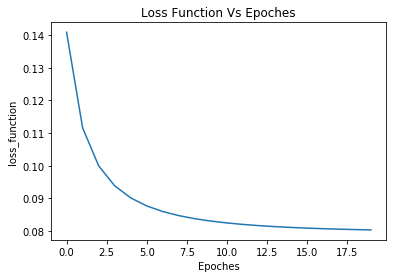

In [17]:

epochs_list = [i for i in range(epochs)]
#print(epochs_list)
plt.plot(epochs_list,loss)
plt.xlabel("Epoches")
plt.ylabel("loss_function")
plt.title("Loss Function Vs Epoches")

# Compute ftest by passing Xtest to the decision function. Now compute the value of P(Y=1|Xtest) = 1/(1+exp(-(w*ftest+ b))).The size of this output will be the same as the size of the Xtest where each value will be a scalar corresponding to the probability of that point in Xtest to belong to 1. Print the output once done.

In [22]:

b = clf.intercept_[0]
#print(b)
for x in X_test:
    f = decision_function(clf.support_vectors_,clf.n_support_,clf.dual_coef_,clf.intercept_,x)[0]
    #print(f)
    #print(w_mag)
    prob = (1/(1+math.exp(-((w*f)+b))))
    print("For ",x,"probability is",prob)

For  [ 0.56205839  0.95914624  0.47392055  0.64027871 -0.65230023] probability is 0.03797005183831936
For  [-1.12868355  0.5259836  -0.11371356 -0.11703555  0.79121172] probability is 0.9671697845817276
For  [ 0.77827558 -1.04397189  0.04636056  0.00756786 -1.0188899 ] probability is 0.055375289600710365
For  [-0.10445915 -1.35403628 -0.55372204 -0.7593877   0.56623399] probability is 0.9864660010309189
For  [-1.28523571  0.04712579  0.15703589  0.19905871 -0.44336442] probability is 0.1769246497759671
For  [-1.47325101  1.7701801   0.43925358  0.63609024  0.13509864] probability is 0.3115275393497318
For  [ 1.20189375 -0.15709433  0.12650684  0.15091977 -0.52090478] probability is 0.18627507547794694
For  [ 1.49952363 -0.58600389  0.13007707  0.13463546 -0.89191499] probability is 0.06772504871576612
For  [-1.07690686 -0.15079241  0.23152617  0.28282199 -0.83857399] probability is 0.04500821994677382
For  [-0.26724655 -1.15451929  0.07747155  0.04120209 -1.20735807] probability is 0.0

For  [ 1.31614485  1.82298738 -0.08456671 -0.01774079  1.79029605] probability is 0.9985899588735699
For  [-1.54778667 -0.91188039  0.04234206  0.00892525 -0.89565317] probability is 0.07110002312499332
For  [ 1.26713016  1.99215205  0.58754089  0.8326484  -0.13459423] probability is 0.12332687942300999
For  [-1.30563968 -0.83845904  0.11052015  0.09791098 -1.04368618] probability is 0.0362408083937393
For  [ 0.19569218  1.39891509  0.42026167  0.59432369 -0.11814028] probability is 0.1965110215682721
For  [-0.47530866  0.68653284 -0.01305608  0.0168661   0.61643294] probability is 0.9227827695523196
For  [ 2.1676674  -1.71610792  0.06316327 -0.00390666 -1.63475979] probability is 0.009575581067561649
For  [-0.06780266 -1.17102703 -0.47156443 -0.64758079  0.46719981] probability is 0.9755352413643819
For  [ 1.16515594  0.90042372 -0.01377109  0.02632189  0.79817387] probability is 0.9609512717624142
For  [-0.90672914  0.61616376 -0.20738771 -0.23005193  1.15497986] probability is 0.992

For  [-1.17191811 -1.03546864 -0.02867374 -0.08604431 -0.78100409] probability is 0.12469497422971106
For  [-0.4837323   1.31076284  0.47617232  0.66011766 -0.36407452] probability is 0.08025087209129088
For  [-0.47813153 -0.10130794 -0.13523763 -0.1743661   0.33084861] probability is 0.8835561571226838
For  [-0.22466206 -1.34842271  0.12235494  0.08805999 -1.50814948] probability is 0.008513437927592536
For  [ 0.12148292  1.08228351  0.50112327  0.68032531 -0.63259235] probability is 0.034928211959767475
For  [-2.11924105  1.44662545  0.4146469   0.58959701 -0.060825  ] probability is 0.21335883990180368
For  [-0.11364447  0.83659754  0.48316231  0.64592832 -0.78358941] probability is 0.023099208592834347
For  [ 0.52031622  1.39431151  0.51817436  0.71679295 -0.42310908] probability is 0.06361739579098585
For  [ 0.39888386 -0.29970417  0.33962963  0.41107694 -1.29601555] probability is 0.008273176529604855
For  [ 0.16729571 -0.09489727  0.3557654   0.4412084  -1.1737199 ] probability 

For  [-2.16355502 -0.31380573  0.16718081  0.19430294 -0.77753189] probability is 0.06715415501751636
For  [ 1.60272616 -0.61229226  0.10668833  0.10405529 -0.84205581] probability is 0.085837088924773
For  [-1.16745975  1.34490092  0.46185975  0.64383512 -0.29140418] probability is 0.10048828928972012
For  [ 0.77537917 -1.76762352  0.04130614 -0.03378853 -1.61078668] probability is 0.008901059762519222
For  [-0.21746259 -0.89636608  0.19082197  0.19573274 -1.33924089] probability is 0.011468571210013339
For  [ 1.54887698  1.41927397  0.47367038  0.66223419 -0.26529516] probability is 0.13137492017455207
For  [ 0.3972256  -0.57652215  0.26058651  0.29863262 -1.2853031 ] probability is 0.01126847721637857
For  [-0.60937717  0.43230924 -0.21740841 -0.2515067   1.03146658] probability is 0.9895840888634104
For  [-0.46539932 -1.1004281   0.07989125  0.04685203 -1.16939453] probability is 0.028063916570868246
For  [-2.01777685 -2.13787854 -0.11837923 -0.25180584 -1.43051234] probability is 

For  [ 0.38190284  0.52693405  0.28819548  0.38663311 -0.44395516] probability is 0.12830987690029397
For  [-0.42801231  0.31810543  0.0229427   0.0441444   0.19646665] probability is 0.7350839265903734
For  [-0.52341609  1.66575495  0.00171576  0.08276809  1.39297473] probability is 0.9921696156961847
For  [-0.71790141  0.68154156  0.46983014  0.62171779 -0.87274537] probability is 0.017719651742760564
For  [-1.50694727  1.10401636  0.4689007   0.64099979 -0.51525761] probability is 0.051100370376602915
For  [ 1.14177626 -1.01805247  0.00471478 -0.04336305 -0.86906233] probability is 0.10278725830468097
For  [-0.09388957 -1.28933698 -0.52731255 -0.72316331  0.53932781] probability is 0.9838770311086287
For  [ 0.585611    0.06544894 -0.06721327 -0.0810558   0.2616351 ] probability is 0.8376166795992404
For  [ 0.10338023 -0.45963241  0.1830246   0.20709879 -0.9486636 ] probability is 0.040647822519011285
For  [ 8.40813103e-01  2.44871494e+00 -9.36725153e-02  1.13248596e-03
  2.34354042e

For  [-1.73466222 -0.04021783  0.47576563  0.59422418 -1.49685033] probability is 0.002443844005323534
For  [ 0.16846477 -0.5566157   0.27381802  0.31617614 -1.30928344] probability is 0.009757198507554719
For  [-1.02757938 -0.60628763 -0.14214765 -0.20746456 -0.07178638] probability is 0.6761777605095313
For  [-0.56852812  0.37634673  0.47245701  0.61023884 -1.13700715] probability is 0.007817830424338708
For  [-0.42040926  0.26300391  0.46901557  0.60044096 -1.22156498] probability is 0.00614111792301596
For  [ 0.1072182   0.61988678  0.54785462  0.71650449 -1.1644426 ] probability is 0.005768600942582339
For  [-0.94211297 -0.1995074   0.35973077  0.44111446 -1.27372512] probability is 0.007500921794612862
For  [-1.10039979  0.19405488  0.18400312  0.23996168 -0.40296124] probability is 0.18193744185726282
For  [-0.62982417  1.5210264   0.17309725  0.29051769  0.74444981] probability is 0.8964338070409219
For  [ 0.05413391 -0.62965284 -0.44730095 -0.59097572  0.84701871] probability 

For  [ 0.02989763  0.54180024 -0.24797996 -0.28451611  1.2173891 ] probability is 0.9950118989857611
For  [ 0.82448985 -2.07073945 -0.18418899 -0.33102113 -1.17177467] probability is 0.07298804102611994
For  [-0.70167183 -1.30097812 -0.52638794 -0.72256811  0.52671275] probability is 0.9826398021230848
For  [-1.68350009 -0.8699246  -0.48102173 -0.64485895  0.74903156] probability is 0.9898414819351304
For  [ 0.11384518  1.11213546  0.42888996  0.59125622 -0.38539993] probability is 0.09276850694086987
For  [ 0.09205615 -2.2597757  -0.1373615  -0.28149157 -1.47445909] probability is 0.023048558175624373
For  [-1.22113082  1.71455658  0.56909468  0.796099   -0.31088415] probability is 0.0652645248831359
For  [ 0.8778618  -0.64887327 -0.04514268 -0.08797097 -0.40584625] probability is 0.36790572150216383
For  [-0.47833965 -0.64795672  0.09335647  0.08562339 -0.83099432] probability is 0.07506697993387293
For  [-0.49457178  0.57925312  0.26174512  0.35602091 -0.31869698] probability is 0.1

For  [-0.83969049  0.11209876  0.33947818  0.43081733 -0.94987835] probability is 0.02214339593535551
For  [-0.19770384  1.3318945   0.62198533  0.8438552  -0.79474567] probability is 0.013384386802782424
For  [ 0.73022495 -0.21280917  0.0734732   0.08176812 -0.40458146] probability is 0.2739004107358147
For  [-0.33222381  1.4039752   0.60154781  0.82173394 -0.67139023] probability is 0.020783457687853214
For  [-0.95524076  0.28821615  0.3643326   0.47048542 -0.87847686] probability is 0.025138815378068835
For  [ 0.85223639  0.5318241   0.36008681  0.4769551  -0.66093315] probability is 0.05701136285292453
For  [ 0.55302338  1.31916822 -0.00550869  0.05694143  1.1242633 ] probability is 0.9840452041473557
For  [-0.62777181  0.29780123  0.33284245  0.43148976 -0.77359144] probability is 0.039242492645397364
For  [-0.35363873  1.05839644  0.62830295  0.83853508 -1.04375079] probability is 0.006014746238443399
For  [ 1.76978583  0.9357938   0.4391341   0.59555845 -0.56492601] probability 

For  [ 0.65751539 -3.91151666 -0.8818165  -1.29429032 -0.57157268] probability is 0.8350494310247993
For  [ 0.87832839  1.8280486  -0.10394483 -0.04177811  1.85413676] probability is 0.9988731237308172
For  [-1.50576844  0.66793375  0.48739585  0.64307039 -0.93818659] probability is 0.013277834624827194
For  [ 0.62650898  0.80311664  0.52647029  0.69857613 -0.94487581] probability is 0.013005647718894356
For  [ 1.09284217  0.61639026  0.37950113  0.5053755  -0.64965107] probability is 0.056879696072295906
For  [ 1.31195864 -0.594573   -0.01002452 -0.04133724 -0.46826267] probability is 0.30822001678837474
For  [0.14828445 1.78788058 0.48180695 0.69026952 0.01909499] probability is 0.22742664895951734
For  [-0.07979567  0.19767269  0.07151252  0.09917748 -0.05398941] probability is 0.5176002757978001
For  [ 0.23569914 -1.51551389 -0.55242917 -0.76558271  0.4267122 ] probability is 0.9791775271214282
For  [ 0.22811421 -0.36697064  0.32322361  0.38726343 -1.30202731] probability is 0.0084